<a href="https://colab.research.google.com/github/Frankensosege/MachineLearning/blob/main/03_3_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

특성공학 (feature enginiering): 가지고있는 특성을 바탕으로 새로운 특성을 생성 예:3-2에서 길이제곱</p>
특성추출 (feature extraction): 가진 특성중에 필요한 특성을 선택하여 사용</p>
규제 : 릿지, 라쏘

In [1]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
print(df.info())
print(df.describe())
perch_full = df.to_numpy()
print(perch_full)
print(perch_full.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB
None
          length     height      width
count  56.000000  56.000000  56.000000
mean   27.892857   7.862143   4.745536
std     9.021668   2.878343   1.775006
min     8.400000   2.110000   1.410000
25%    21.825000   5.690000   3.520000
50%    25.300000   6.920000   4.155000
75%    36.625000  10.850000   6.450000
max    44.000000  12.800000   8.140000
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.4

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(42, 3) (14, 3) (42,) (14,)


보유한 농어의 정보들을 동일한 행열의 행렬 곱 형태로 특성의 갯수를 늘려준다

In [3]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(degree=2, include_bias=False) # degree=2, include_bias=True (default)
poly = PolynomialFeatures()
#1, 2, 5, 9, 2**2, 5**2, 9**2, 2*5, 5*9, 9*2
poly.fit([[2, 5, 9]])
print(poly.transform([[2, 5, 9]]))
#== poly.fit_transform([[2, 5, 9]])
# fit + transform == fit_transform :

[[ 1.  2.  5.  9.  4. 10. 18. 25. 45. 81.]]


In [4]:
poly = PolynomialFeatures(degree=2, include_bias=False) # degree=2, include_bias=True (default)
poly.fit([[2, 5, 9]])
print(poly.transform([[2, 5, 9]]))

[[ 2.  5.  9.  4. 10. 18. 25. 45. 81.]]


In [5]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


transform으로 늘려준 특성에 대한 정보를 확인

In [6]:
print(poly.get_feature_names_out())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [7]:
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [9]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [10]:
#lr.prdict()

transform의 degree를 지나치게 많이 한경우 과대적합 발생

In [11]:
poly = PolynomialFeatures(degree=5, include_bias=False) # degree=2, include_bias=True (default)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


StandardScaler를 사용하여 서로다른 단위를 가진 데이터 셋을 표준화한다.</p>
https://scikit-learn.org/stable/modules/preprocessing.html

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [13]:
print(train_scaled[:3])

[[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
  -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
  -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
  -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
  -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
  -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
  -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
  -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
  -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 -0.76472563 -0.7717585  -0.77238267
  -0.7747325  -0.77298293 -0.76716811 -0.76291014 -0.76770896 -0.77117372
  -0.7701438  -0.77242144 -0.77168016 -0.7701077  -0.7710676  -0.76852551
  -0.76268353 -0.74414953 -0.74888304 -0.75336339 -0.75182759 -0.75602974
  -0.75767358 -0.752762


# 릿지 회귀</p>
Ridge : $$||y - Xw||^2_2 + alpha * ||w||^2_2$$</p>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html</p>
*hyperparameter : 머신러닝이 학습하지 않고 사람이 직접 지정해 주어야하는 파라메터*</p>
경사하강법



In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge() # 파라메터로 alpha=n (default : 1)을 사용하여 규제 강도를 조절 할 수 있다. n이 작을 수 록 과대 적합 될 가능성이 많아진다.(hyperparameter)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


그래프에서 최적점의 외쪽은 과대, 오른쪽은 과소 적합

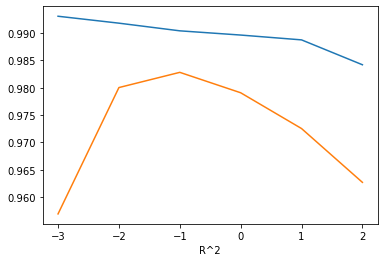

In [18]:
import matplotlib.pyplot as plt

train_score=[]
test_score=[]

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.xlabel('R^2')
plt.show()

In [20]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [30]:
print(ridge.coef_)

[ 27.61933479  -1.64022156 -19.73256036  30.03061951  16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]


# 라쏘회귀</p>
lasso $$(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1$$</p>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html</p>
좌표하강법

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


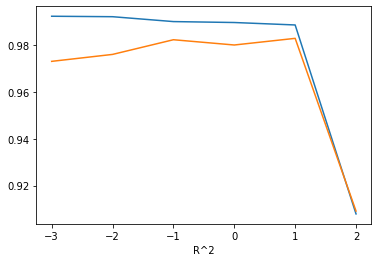

In [27]:
train_score=[]
test_score=[]

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.xlabel('R^2')
plt.show()

In [28]:
lasso = Lasso(alpha=10, max_iter=10000)
lasso.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [31]:
print(lasso.coef_)
print(sum(lasso.coef_==0))

[  0.           0.           0.           0.           0.
 103.82164392   0.           0.           0.           0.
  24.775336     0.         130.86984839   0.           0.45505876
   0.           0.           0.          26.58288964   0.
   0.           0.           0.           0.           0.
  37.35084953   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.          17.63825287
   0.           0.           0.           0.           0.        ]
48
